In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from jupyterlab.semver import compare

# Data Preprocessing

## WEP Data

In [ ]:
wep  = pd.read_csv('../data/wep_aug2023_aug2024.csv')
wep['Datetime'] = pd.to_datetime(wep['Datetime'])

### Data Check

In [ ]:
# Check for duplicates

wep_duplicates = wep[wep.duplicated()]

### WEP Boxplot Description

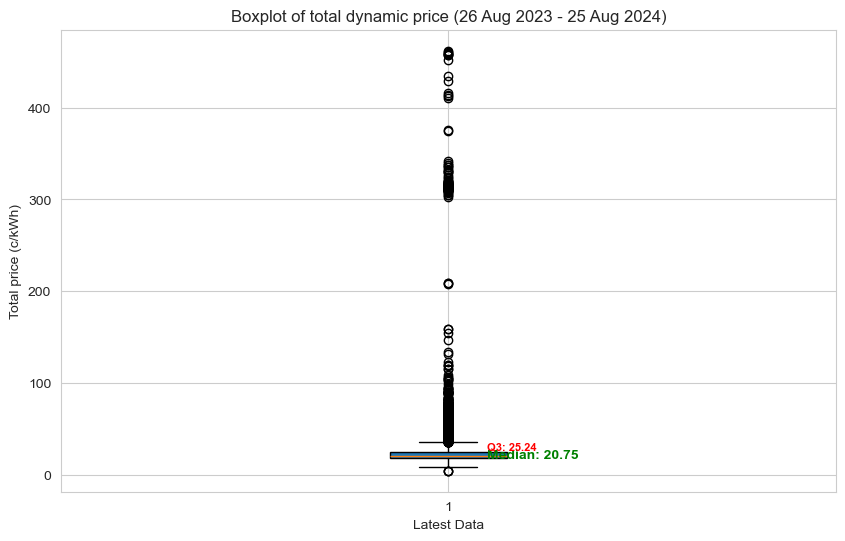

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

# Generating the boxplot using the Axes object
boxplot = ax.boxplot(wep['total price (c/kWh)'], vert=True, patch_artist=True)

# Annotate Q3 and Median
for i, line in enumerate(boxplot['medians']):
    median_value = round(line.get_ydata()[0], 2)
    ax.text(i + 1.05, median_value, f'Median: {median_value}', verticalalignment='center',
            fontsize=10, color='green', weight='bold')

for i, line in enumerate(boxplot['boxes']):
    q3_value = round(np.percentile(wep['total price (c/kWh)'], 75), 2)
    ax.text(i + 1.05, q3_value, f'Q3: {q3_value}', verticalalignment='bottom',
            fontsize=8, color='red', weight='bold')

# Setting titles and labels
ax.set_title('Boxplot of total dynamic price (26 Aug 2023 - 25 Aug 2024)')
ax.set_xlabel('Latest Data')
ax.set_ylabel('Total price (c/kWh)')

# Display the plot
plt.show()

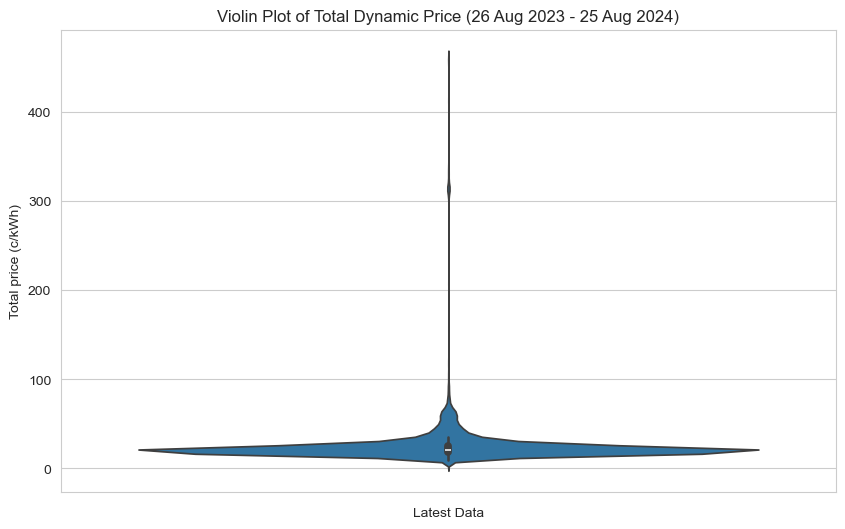

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(10, 6))

# Generating the violin plot
sns.violinplot(data=wep, y='total price (c/kWh)', ax=ax)

# # Annotate Q3 and Median
# median_value = round(np.median(wep['total price (c/kWh)']), 2)
# q3_value = round(np.percentile(wep['total price (c/kWh)'], 75), 2)
#
# # Adding median annotation
# ax.text(0.05, median_value, f'Median: {median_value}', verticalalignment='center',
#         fontsize=10, color='green', weight='bold', transform=ax.get_yaxis_transform())
#
# # Adding Q3 annotation
# ax.text(0.05, q3_value, f'Q3: {q3_value}', verticalalignment='bottom',
#         fontsize=8, color='red', weight='bold', transform=ax.get_yaxis_transform())

# Setting titles and labels
ax.set_title('Violin Plot of Total Dynamic Price (26 Aug 2023 - 25 Aug 2024)')
ax.set_xlabel('Latest Data')
ax.set_ylabel('Total price (c/kWh)')

# Display the plot
plt.show()


## SRLP Data

In [ ]:
# Load data

srlp = pd.read_csv('../data/srlp_2019_2024.csv')
srlp['interval'] = pd.to_datetime(srlp['interval'], format='%H:%M')
srlp['half hour'] = srlp['interval'].dt.strftime('%H:%M')

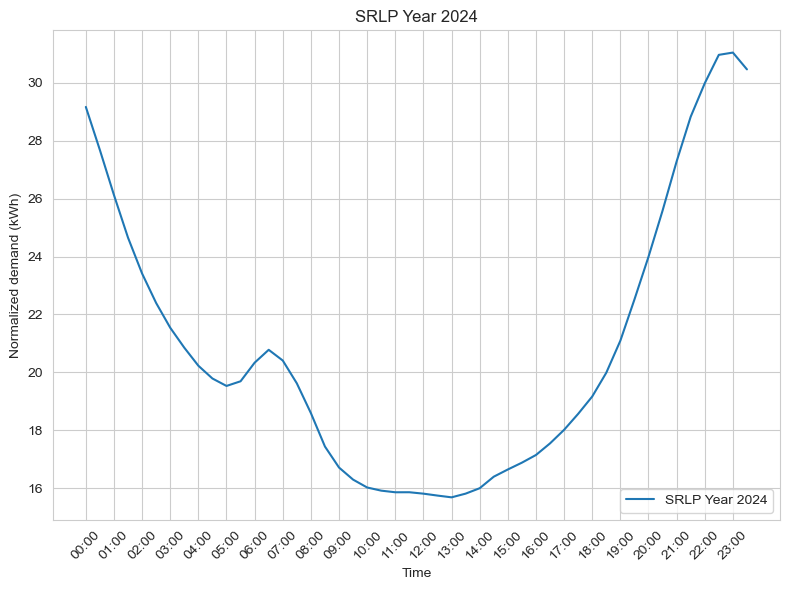

In [ ]:
# Plot comparison

x = np.arange(0, 48)
time_labels = [f"{int(i//2):02}:{int((i%2)*30):02}" for i in range(47+1)]


plt.figure(figsize=(8, 6))

plt.plot(srlp['2024'], label='SRLP Year 2024')

# Set custom ticks for the x-axis
plt.xticks(ticks=np.arange(0, 48, 2), labels=time_labels[::2], rotation=45)

plt.xlabel('Time')
plt.ylabel('Normalized demand (kWh)')
plt.title('SRLP Year 2024')
plt.legend(loc='lower right')

plt.grid(True)

plt.tight_layout()
plt.show()

## Combined price and SRLP

In [ ]:
wep['half hour'] = wep['half hour'].str.strip()
srlp['half hour'] = srlp['half hour'].str.strip()

In [ ]:
df = wep.merge(srlp[['half hour', '2024']], on='half hour', how='left')
df.rename(columns={'2024':'SRLP'}, inplace=True)

For calculating the bill, I scaled down the SRLP to be normalized to 12 kWh/day. This will give a more reasonable monthly household electricity consumption, i.e., around 364 kWh/month

In [ ]:
multiplier = 12
df['SRLP_normalized'] = df['SRLP']*multiplier/1000
df['dynamic bill (cents)'] = df['SRLP_normalized']*df['total price (c/kWh)']

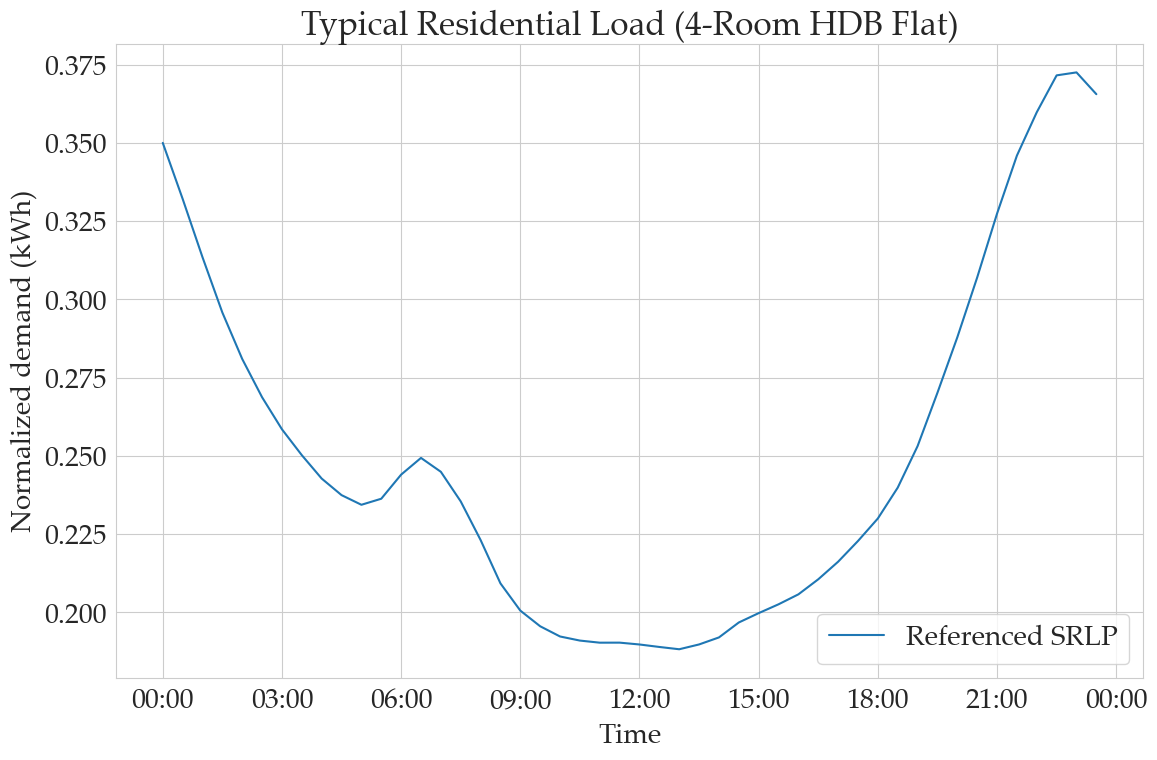

In [ ]:
# REFERENCED SRLP

start = pd.to_datetime('2023-09-01 00:00')
end = pd.to_datetime('2023-09-01 23:30')
referenced_df = df[df['Datetime'].between(start, end)]

plt.rc('font', family='Palatino Linotype')
plt.rc('font', size=20)

fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(referenced_df['Datetime'], referenced_df['SRLP_normalized'], label='Referenced SRLP')

# Format the x-axis to show only time (HH:MM)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

plt.xlabel('Time')
plt.ylabel('Normalized demand (kWh)')
plt.title('Typical Residential Load (4-Room HDB Flat)')
plt.legend(loc='lower right')

plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
referenced_df

,Datetime,WEP (c/kWh),half hour,total price (c/kWh),SRLP,SRLP_normalized,dynamic bill (cents),month,regulated tariff (c/kWh),regulated bill (cents)
288,2023-09-01 00:00:00,12.245,00:00,18.605,29.166,0.349992,6.511601,2023-09,29.96,10.485760
289,2023-09-01 00:30:00,12.311,00:30,18.671,27.676,0.332112,6.200863,2023-09,29.96,9.950076
290,2023-09-01 01:00:00,12.299,01:00,18.659,26.122,0.313464,5.848925,2023-09,29.96,9.391381
291,2023-09-01 01:30:00,12.284,01:30,18.644,24.649,0.295788,5.514671,2023-09,29.96,8.861808
292,2023-09-01 02:00:00,12.301,02:00,18.661,23.412,0.280944,5.242696,2023-09,29.96,8.417082
293,2023-09-01 02:30:00,11.826,02:30,18.186,22.393,0.268716,4.886869,2023-09,29.96,8.050731
294,2023-09-01 03:00:00,11.835,03:00,18.195,21.540,0.258480,4.703044,2023-09,29.96,7.744061
295,2023-09-01 03:30:00,10.053,03:30,16.413,20.851,0.250212,4.106730,2023-09,29.96,7.496352
296,2023-09-01 04:00:00,10.134,04:00,16.494,20.228,0.242736,4.003688,2023-09,29.96,7.272371
297,2023-09-01 04:30:00,11.846,04:30,18.206,19.787,0.237444,4.322905,2023-09,29.96,7.113822


In [ ]:
referenced_df.to_csv('../data/referenced_df.csv', index=False)

In [ ]:
df['month'] = df['Datetime'].dt.to_period('M')

# Cost Saving Simulation

## Regulated Tariff

Using the normalized SRLP to 12 kWh/day, and regulated tariff as follows:

Sep 2023: 29.96 c/kWh

Oct - Dec 2023: 31 c/kWh

Jan - Mar 2024: 32.58 c/kWh

Apr - Jun 2024: 32.47 c/kWh

Jul - Sep 2024: 32.57 c/kWh


In [ ]:
tariff_intervals = {
    ('2023-08', '2023-09'): 29.96,
    ('2023-10', '2023-12'): 31.00,
    ('2024-01', '2024-03'): 32.58,
    ('2024-04', '2024-06'): 32.47,
    ('2024-07', '2024-09'): 32.57
}

In [ ]:
def assign_tariff(date):
    for (start, end), tariff in tariff_intervals.items():
        if pd.Period(start) <= pd.Period(date, freq='M') <= pd.Period(end):
            return tariff
    return None  # For dates outside the defined intervals

# Add the new column 'regulated tariff (c/kWh)' based on the Datetime column
df['regulated tariff (c/kWh)'] = df['Datetime'].dt.to_period('M').apply(assign_tariff)

In [ ]:
df['regulated bill (cents)'] = df['SRLP_normalized']*df['regulated tariff (c/kWh)']

In [ ]:
regulated_monthly_bill = df.groupby('month')['regulated bill (cents)'].sum()/100

C:\Users\rezky\AppData\Local\Temp\ipykernel_14300\183739828.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([pd.Period(m).strftime('%b %Y') for m in regulated_monthly_bill.index], rotation=45)


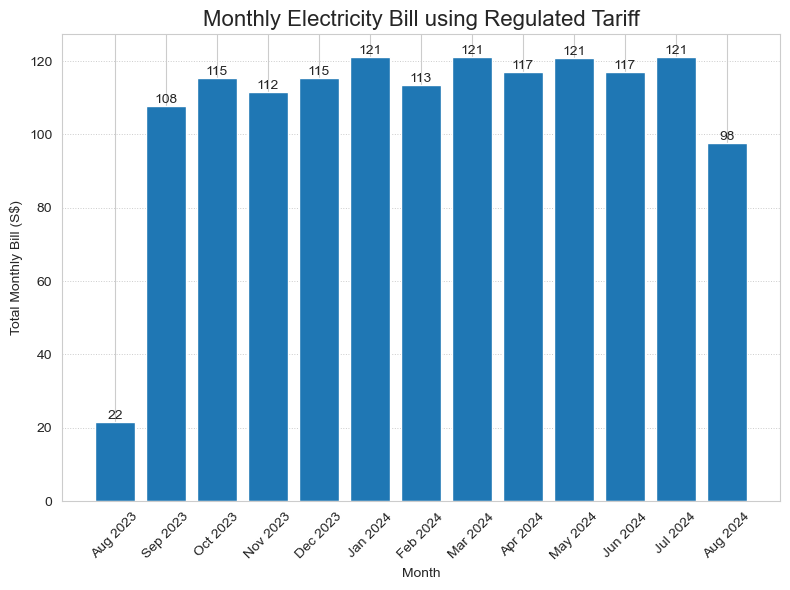

In [ ]:
# PLOTTING

fig, ax = plt.subplots(figsize=(8, 6))

bars = ax.bar(regulated_monthly_bill.index.astype(str), regulated_monthly_bill.values)

# Format x-axis labels to display in "MMM YYYY" format
ax.set_xticklabels([pd.Period(m).strftime('%b %Y') for m in regulated_monthly_bill.index], rotation=45)

# Set labels and title
ax.set_title('Monthly Electricity Bill using Regulated Tariff', fontsize=16)
ax.set_ylabel('Total Monthly Bill (S$)')
ax.set_xlabel('Month')

# Show grid for better readability
ax.grid(True, axis='y', linestyle=':', linewidth=0.7)

# Add data labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.0f}', ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()

## Case 1: Switch and Do Nothing

In [ ]:
# Function to compare bill

def compare_viz(categories, val1, val2, val3=None):
    fig, ax = plt.subplots(figsize=(8, 6))

    bar_width = 0.25 if val3 is not None else 0.35
    x = np.arange(len(categories))

    # Plot bars and store them in a list for easy label addition
    bars = [
        ax.bar(x, val1, bar_width, label='Regulated Bill'),
        ax.bar(x + bar_width, val2, bar_width, label='Dynamic Bill (Do Nothing)')
    ]
    if val3 is not None:
        bars.append(ax.bar(x + 2 * bar_width, val3, bar_width, label='Dynamic Bill (Shift everything)'))

    # Set x-ticks and labels
    ax.set_xticks(x + bar_width * (1 if val3 is None else 1.5))
    ax.set_xticklabels([pd.Period(m).strftime('%b %Y') for m in categories], rotation=45)

    # Set labels, title, and grid
    ax.set_title('Bill Comparison', fontsize=16)
    ax.set_ylabel('Total Monthly Bill (S$)')
    ax.set_xlabel('Month')
    ax.grid(True, axis='y', linestyle=':', linewidth=0.7)

    # Add data labels on top of each bar
    for bar_group in bars:
        for bar in bar_group:
            yval = bar.get_height()
            ax.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.0f}', ha='center', va='bottom')

    # Show legend and plot
    ax.legend()
    plt.tight_layout()
    plt.show()

In [ ]:
# Function to compare savings


In [ ]:
dynamic_monthly_bill = df.groupby('month')['dynamic bill (cents)'].sum()/100

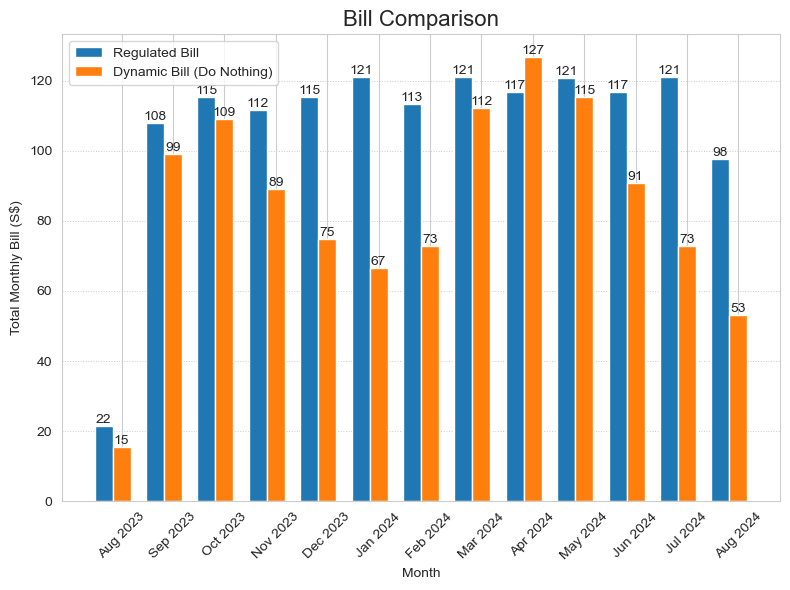

In [ ]:
# Side by side comparison

categories = dynamic_monthly_bill.index.astype(str)
val1 = regulated_monthly_bill.values
val2 = dynamic_monthly_bill.values

compare_viz(categories, val1, val2)


C:\Users\rezky\AppData\Local\Temp\ipykernel_14300\424901994.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([pd.Period(m).strftime('%b %Y') for m in dynamic_monthly_bill.index], rotation=45)


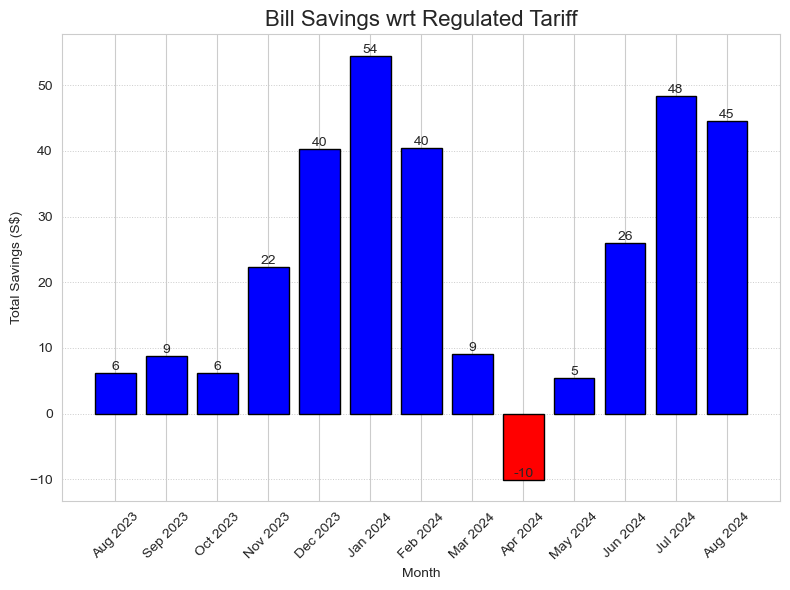

In [ ]:
# Bill saving compared to regulated tariff

savings = regulated_monthly_bill.values - dynamic_monthly_bill.values
colors = ['red' if value < 0 else 'blue' for value in savings]

fig, ax = plt.subplots(figsize=(8, 6))

bars = ax.bar(dynamic_monthly_bill.index.astype(str), savings, color=colors, edgecolor='black')

# Format x-axis labels to display in "MMM YYYY" format
ax.set_xticklabels([pd.Period(m).strftime('%b %Y') for m in dynamic_monthly_bill.index], rotation=45)

# Set labels and title
ax.set_title('Bill Savings wrt Regulated Tariff', fontsize=16)
ax.set_ylabel('Total Savings (S$)')
ax.set_xlabel('Month')

# Show grid for better readability
ax.grid(True, axis='y', linestyle=':', linewidth=0.7)

# Add data labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.0f}', ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
# Total annual saving

annual_saving1 = (regulated_monthly_bill.values - dynamic_monthly_bill.values).sum()
print(f'Total Annual Savings in Case 1: S$ {annual_saving1}')

Total Annual Savings in Case 1: S$ 302.05522448795995


## Case 2: Switch and Let the App Decide

In [ ]:
load_composition = pd.read_excel('../data/load_composition.xlsx')
load_composition['Time'] = pd.to_datetime(load_composition['Time'], format='%H:%M:%S')
load_composition['half hour'] = load_composition['Time'].dt.strftime('%H:%M')

In [ ]:
# wep['half hour'] = wep['half hour'].str.strip()
# load_composition['half hour'] = load_composition['half hour'].str.strip()

In [ ]:
# Combining load composition and price

df1 = wep.merge(load_composition[['half hour', 'Non-flexible Load (kWh)', 'Flexible Load (kWh)']], on='half hour', how='left')

### Annual median

In [ ]:
# Calculating price

df1['NSL Bill'] = df1['Non-flexible Load (kWh)']*df1['total price (c/kWh)']
df1['SL Bill'] = df1['Flexible Load (kWh)']*(df1['total price (c/kWh)'].median())
df1['App Bill'] = df1['NSL Bill'] + df1['SL Bill']

In [ ]:
df1['month'] = df1['Datetime'].dt.to_period('M')

In [ ]:
dynamic1_monthly_bill = df1.groupby('month')['App Bill'].sum()/100

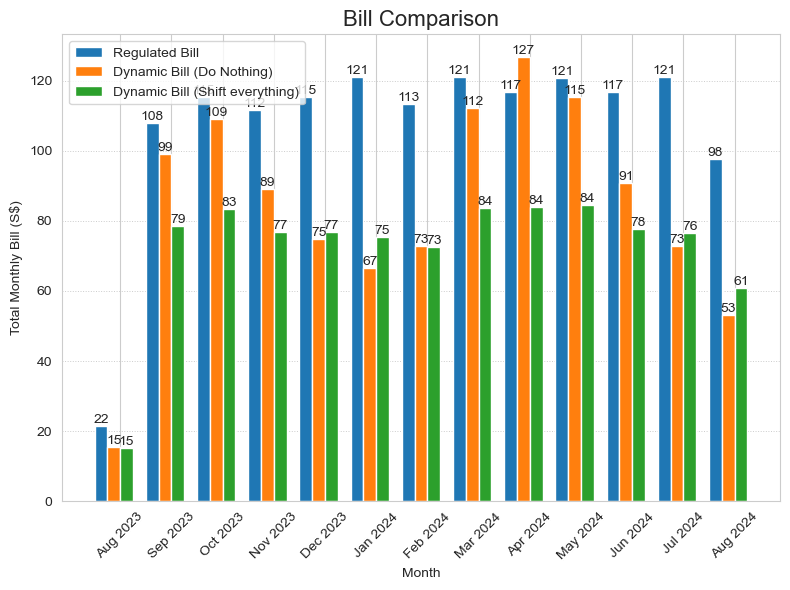

In [ ]:
# Side by side comparison

categories = dynamic_monthly_bill.index.astype(str)
values1 = regulated_monthly_bill.values
values2 = dynamic_monthly_bill.values
values3 = dynamic1_monthly_bill.values

compare_viz(categories, values1, values2, values3)

In [ ]:
# Total annual saving

annual_saving2 = (regulated_monthly_bill.values - dynamic1_monthly_bill.values).sum()
print(f'Total Annual Savings in Case 2: S$ {annual_saving2}')

Total Annual Savings in Case 2: S$ 454.9956209549999


### Monthly median

<Figure size 1200x600 with 0 Axes>

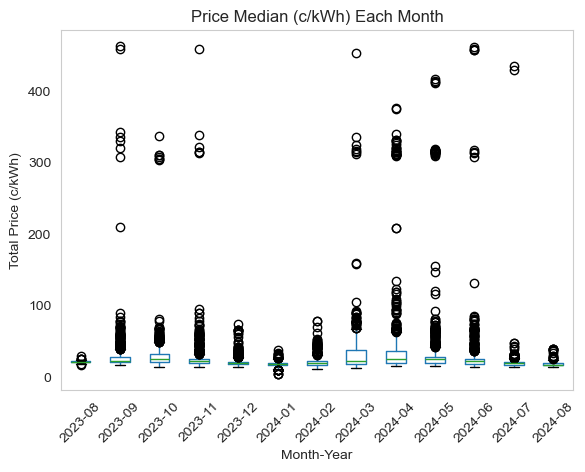

In [ ]:
# Boxplot of price each month

# Group data by Month_Year and create the boxplot
plt.figure(figsize=(12, 6))
df1.boxplot(column='total price (c/kWh)', by='month', grid=False)
plt.title('Price Median (c/kWh) Each Month')
plt.suptitle('')  # Removes the default 'Boxplot grouped by Month_Year' title
plt.xlabel('Month-Year')
plt.ylabel('Total Price (c/kWh)')
plt.xticks(rotation=45)
plt.show()

In [ ]:
monthly_median = df1.groupby('month')['total price (c/kWh)'].median()
df1 = df1.merge(monthly_median.rename('Monthly Median (c/kWh)', inplace=True), on='month', how='left')
print(monthly_median)

month
2023-08    21.2695
2023-09    22.6290
2023-10    25.2900
2023-11    21.6715
2023-12    19.6715
2024-01    18.5225
2024-02    20.1235
2024-03    22.5960
2024-04    25.2125
2024-05    25.5655
2024-06    21.9415
2024-07    18.8390
2024-08    17.2340
Freq: M, Name: Monthly Median (c/kWh), dtype: float64


In [ ]:
# Calculating price

df1['NSL Bill'] = df1['Non-flexible Load (kWh)']*df1['total price (c/kWh)']
df1['SL Bill'] = df1['Flexible Load (kWh)']*(df1['Monthly Median (c/kWh)'])
df1['App Bill'] = df1['NSL Bill'] + df1['SL Bill']

In [ ]:
dynamic1_monthly_bill = df1.groupby('month')['App Bill'].sum()/100

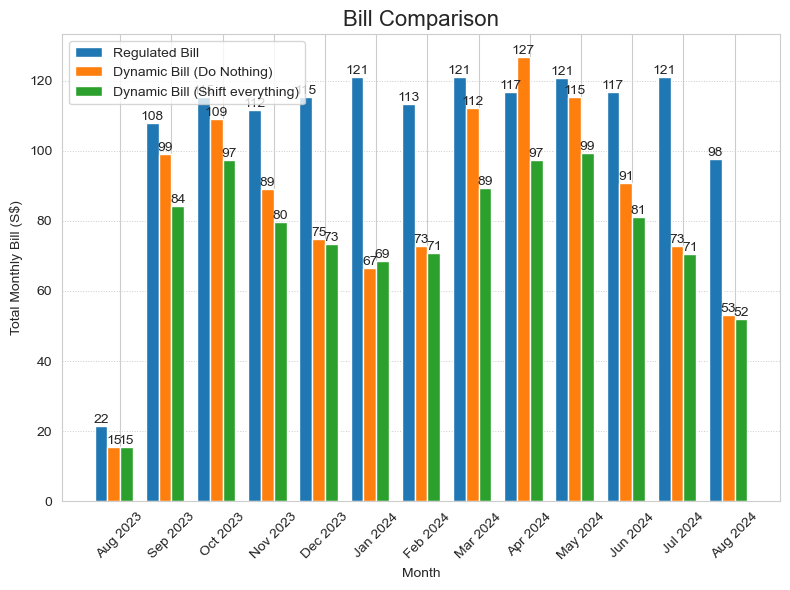

In [ ]:
categories = dynamic_monthly_bill.index.astype(str)
values1 = regulated_monthly_bill.values
values2 = dynamic_monthly_bill.values
values3 = dynamic1_monthly_bill.values

compare_viz(categories, values1, values2, values3)

In [ ]:
# Total annual saving

annual_saving2 = (regulated_monthly_bill.values - dynamic1_monthly_bill.values).sum()
print(f'Total Annual Savings in Case 2: S$ {annual_saving2}')

Total Annual Savings in Case 2: S$ 421.580484795


### Off-peak median

In [ ]:
op_tariff_df = df1[(df1['half hour'] >= '23:00') | (df1['half hour'] < '07:00')]
op_tariff = op_tariff_df['total price (c/kWh)'].values

In [ ]:
op_tariff_median = np.median(op_tariff)
print(f"off peak median: {op_tariff_median}")

off peak median: 18.144


In [ ]:
# Calculating price

df1['NSL Bill'] = df1['Non-flexible Load (kWh)'] * df1['total price (c/kWh)']
df1['SL Bill'] = df1['Flexible Load (kWh)'] * op_tariff_median
df1['App Bill'] = df1['NSL Bill'] + df1['SL Bill']

In [ ]:
dynamic1_monthly_bill = df1.groupby('month')['App Bill'].sum() / 100

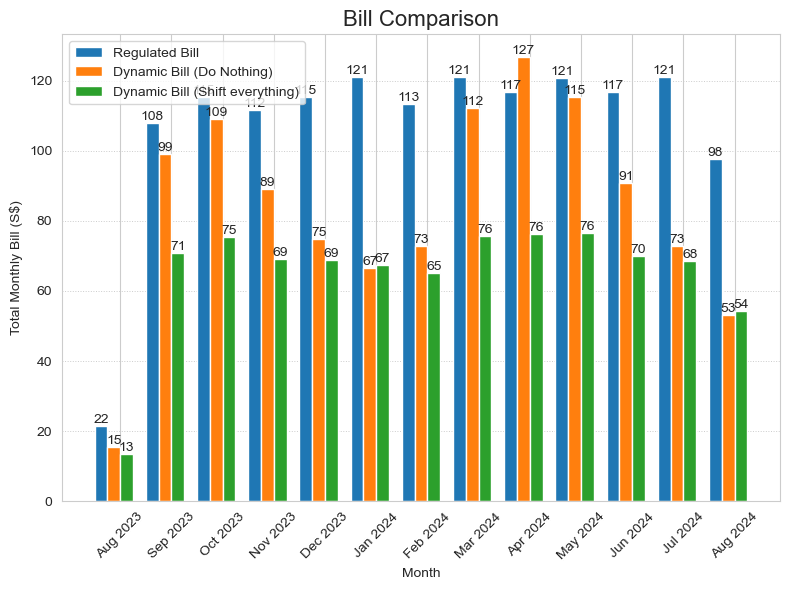

In [ ]:
# Side by side comparison

categories = dynamic_monthly_bill.index.astype(str)
values1 = regulated_monthly_bill.values
values2 = dynamic_monthly_bill.values
values3 = dynamic1_monthly_bill.values

compare_viz(categories, values1, values2, values3)


In [ ]:
annual_saving2 = (regulated_monthly_bill.values - dynamic1_monthly_bill.values).sum()
print(f'Total Annual Savings in Case 2: S$ {annual_saving2}')

Total Annual Savings in Case 2: S$ 549.4451856750001


### Monthly off-peak median

In [ ]:
monthly_op_median = op_tariff_df.groupby('month')['total price (c/kWh)'].median()
df1 = df1.merge(monthly_op_median.rename('Monthly OP Median (c/kWh)', inplace=True), on='month', how='left')


In [ ]:
df1['SL Bill'] = df1['Flexible Load (kWh)']*(df1['Monthly OP Median (c/kWh)'])
df1['App Bill'] = df1['NSL Bill'] + df1['SL Bill']

In [ ]:
dynamic1_monthly_bill = df1.groupby('month')['App Bill'].sum()/100


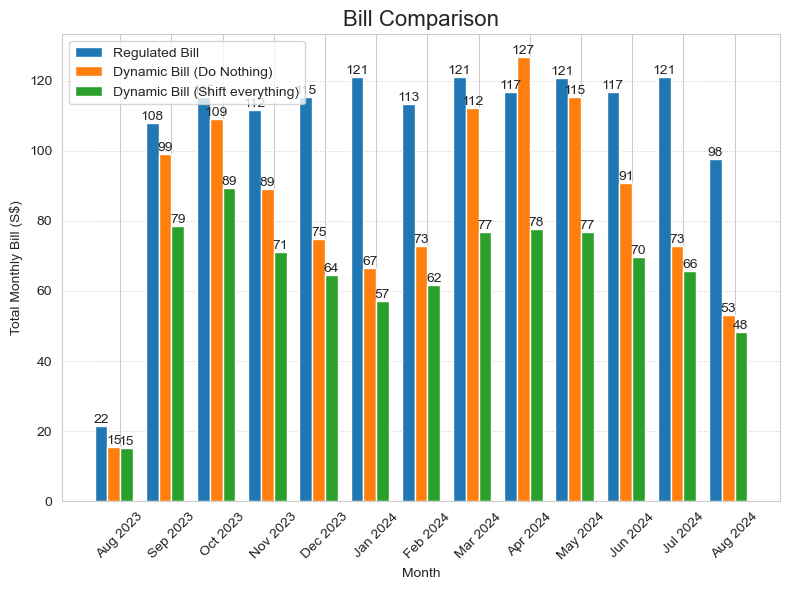

In [ ]:
# Side by side comparison

categories = dynamic_monthly_bill.index.astype(str)
values1 = regulated_monthly_bill.values
values2 = dynamic_monthly_bill.values
values3 = dynamic1_monthly_bill.values

compare_viz(categories, values1, values2, values3)


In [ ]:
annual_saving2 = (regulated_monthly_bill.values - dynamic1_monthly_bill.values).sum()
print(f'Total Annual Savings in Case 2: S$ {annual_saving2}')

Total Annual Savings in Case 2: S$ 548.438572515


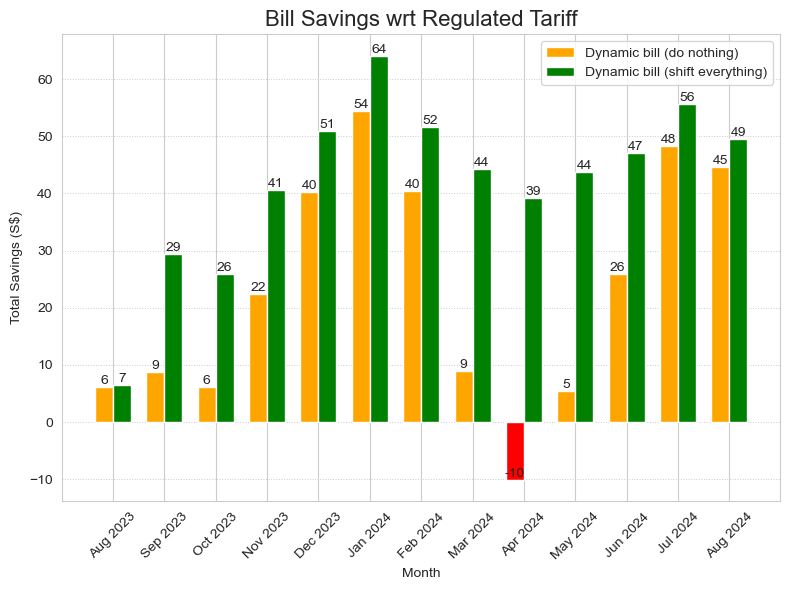

In [ ]:
# Bill saving compared to regulated tariff

savings1 = regulated_monthly_bill.values - dynamic_monthly_bill.values
savings2 = regulated_monthly_bill.values - dynamic1_monthly_bill.values
colors1 = ['red' if value < 0 else 'orange' for value in savings1]
colors2 = ['red' if value < 0 else 'green' for value in savings2]


bar_width = 0.35
x = np.arange(len(categories))

fig, ax = plt.subplots(figsize=(8, 6))

bars = [
        ax.bar(x, savings1, bar_width, label='Dynamic bill (do nothing)', color=colors1),
        ax.bar(x + bar_width, savings2, bar_width, label='Dynamic bill (shift everything)', color=colors2),
    ]
# Format x-axis labels to display in "MMM YYYY" format
ax.set_xticks(x + bar_width / 2)  # Position the ticks in the middle of the grouped bars
ax.set_xticklabels([pd.Period(m).strftime('%b %Y') for m in dynamic1_monthly_bill.index], rotation=45)

# Set labels and title
ax.set_title('Bill Savings wrt Regulated Tariff', fontsize=16)
ax.set_ylabel('Total Savings (S$)')
ax.set_xlabel('Month')

# Show grid for better readability
ax.grid(True, axis='y', linestyle=':', linewidth=0.7)

# Add data labels on top of each bar
for bar_container in bars:
    for bar in bar_container:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.0f}', ha='center', va='bottom')


# Show the plot
ax.legend()
plt.tight_layout()
plt.show()
